# FoodHub Data Analysis 
##### by Joshua Osasona

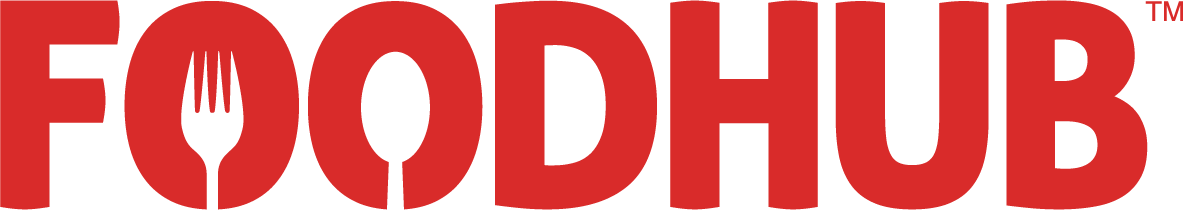

### Context

The number of eateries in New York continues to grow daily. Many students and occupied professionals depend on these dining establishments due to their fast-paced lives. Hence, ordering food online has become a convenient choice for them, allowing them to enjoy delicious meals from their preferred restaurants. FoodHub, a food consolidation company, provides a unified platform via a mobile app, connecting users to numerous restaurants.

With FoodHub, restaurants receive direct orders from eager diners. Once confirmed, a dedicated FoodHub courier springs into action, navigating the city's maze to collect the meal. After securing the savory package, they dash to the customer's location, ensuring a warm delivery. Upon arrival, a quick tap confirms the drop-off. But the journey doesn't end there; diners can rate their experience, ensuring continuous culinary excellence. And for this seamless service? FoodHub takes a modest slice, ensuring the dance of dining delights continues.

### Objective

As the newly appointed Data Scientist, I've been handed a challenge, a set of burning questions from the Data Science team. These aren't just any questions; they're the key to unlocking a deeper understanding of our customers' preferences. By diving deep into this data, I aim to uncover the hidden tastes and trends that drive our diners' decisions.

My mission? To weave through this data, uncover the demand for different restaurants, and serve insights that will elevate our customer experience to peak levels. Join me on this culinary data adventure, as we dish out answers that will not only satiate our company's curiosity but also help spice up our business strategy.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [2]:
# read the data
df = pd.read_csv('foodhub_order.csv')
# returns the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Data Snapshot:** We have rows of orders and columns of information. Let's take a look! 

In [3]:
rows = df.shape[0]
cols = df.shape[1]
print(f'Number of rows: {rows}\nNumber of columns: {cols}')

Number of rows: 1898
Number of columns: 9


##### Observations: There are 1898 rows and 9 columns within the dataframe


### **Data Deep Dive:** Each column tells a story, and its datatype sets the tone. Let's uncover the types behind each column!


In [4]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


##### Observations:
* There are 5 numerical columns (4 integers and 1 float datatype) and 4 object-datatype columns within the dataset.

* The 'rating' column is read as an object datatype but should be a numerical column as we expect numerical values between the range of 1 to 5.


Now let's briefly assess the ratings column

In [5]:
# To see why the rating column has object data type
df['rating'].unique()

array(['Not given', '5', '3', '4'], dtype=object)

We can see from the code above that there are different data types in the rating column. For example, 'Not given' should be read as a NaN (or missing) value. Hence, to solve this problem, let's replace the 'Not given' values with null values.

In [6]:
# replacing values with nan
df['rating'] = df['rating'].replace(['Not given'], np.nan)

# changing the data type to float
df['rating'] = df['rating'].astype(float)

In [7]:
df['rating'].dtype

dtype('float64')

### **Treasure Hunt:** Sometimes data plays hide and seek. Let's check for any missing pieces and bring them back into the picture! 


In [8]:
df.isnull().sum()

order_id                   0
customer_id                0
restaurant_name            0
cuisine_type               0
cost_of_the_order          0
day_of_the_week            0
rating                   736
food_preparation_time      0
delivery_time              0
dtype: int64

#### Observations:
* There are 736 missing values in rating column of the data.
* Once I analyze the distributions of the features in the data, I will address the absence of values in a manner that allows for more effective imputation.

### **Culinary Countdown:** Dive into the numbers! When hunger strikes, time matters. Let's uncover the quickest, average, and longest waits for our dishes to be whipped up!


In [9]:
# Write your code here
pd.set_option('display.float_format', lambda x: '%.2f' % x) # To supress numerical display in scientific notations
df.describe().T

,count,mean,std,min,25%,50%,75%,max
order_id,1898.00,1477495.50,548.05,1476547.00,1477021.25,1477495.50,1477969.75,1478444.00
customer_id,1898.00,171168.48,113698.14,1311.00,77787.75,128600.00,270525.00,405334.00
cost_of_the_order,1898.00,16.50,7.48,4.47,12.08,14.14,22.30,35.41
rating,1162.00,4.34,0.74,3.00,4.00,5.00,5.00,5.00
food_preparation_time,1898.00,27.37,4.63,20.00,23.00,27.00,31.00,35.00
delivery_time,1898.00,24.16,4.97,15.00,20.00,25.00,28.00,33.00


#### Observations:
* Minimum time for food prep: 20 mins
* Average time for food prep: 27.37 mins
* Maximum time for food prep: 35 mins


### **Rating Riddle:** Every dish has a tale, but not all are told. Let's find out how many orders slipped by without a rating!

In [10]:
# Write the code here
print(df['rating'].value_counts(dropna=False))

NaN     736
5.00    588
4.00    386
3.00    188
Name: rating, dtype: int64


#### Observations:
* 736 orders were not rated. Recall that ratings not given were converted to nan values.

### Treating the Missing values of the rating column

In [11]:
# checking the percentage of missing values within the columns of the dataframe
missing_percent_rating = (df['rating'].isnull().sum() / len(df['rating'])) * 100
print(f"Percentage of missing values in the 'rating' column: {round(missing_percent_rating,2)}%")

Percentage of missing values in the 'rating' column: 38.78%


* We have about 39% of missing samples in the ratings column which is quite substantial. Dropping these samples will lead to loss of a large chunk of the dataset. Hence the need for data imputation.
* One of the commonly used method to deal with the missing values is to impute them with the central tendencies such as the mean, median or mode. If there are no outliers in the rating column, I'd use the mean.
* Now let's see if there are outliers in the rating column

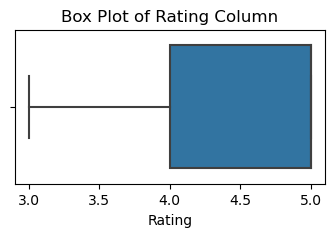

In [12]:
plt.figure(figsize=(4, 2))
sns.boxplot(x=df['rating'])
plt.xlabel('Rating')
plt.title('Box Plot of Rating Column')
plt.show()

* Now that I know there are no outliers, one of the approaches to treat the missing values of this column would be to group the data on the basis of cuisine type to get a better idea of the average number of ratings.
* It is more likely that a property of certain type of cuisine would have similar ratings.

In [13]:
# checking for the average number of ratings based on the cuisine type
df.groupby(['cuisine_type'])[['rating']].mean()

,rating
cuisine_type,
American,4.30
Chinese,4.34
French,4.30
Indian,4.54
Italian,4.36
Japanese,4.37
Korean,4.11
Mediterranean,4.22
Mexican,4.42


* Now that I have received the mean number of ratings for each cuisine type, I will use fillna() function and transform method of pandas to impute the missing values.
* I'd create a new column to store the imputed rating column to preserve the initial ratings column

In [14]:
# imputing missing values in the rating column based on averages of the cuisine types
df['new_rating'] = df['rating'].fillna(value = df.groupby(['cuisine_type'])['rating'].transform('mean'))

In [15]:
# checking if all the missing values were imputed in the rating column
df['new_rating'].isnull().sum()

0

In [16]:
df.sample()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,new_rating
665,1478204,64153,Blue Ribbon Fried Chicken,American,14.07,Weekday,4.00,34,24,4.00


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Data Discovery:** Our data is a canvas of colors and patterns. Let's paint the picture with histograms, boxplots, and countplots to reveal the stories each variable holds! 


***Let's assess the distribution of the numerical columns.***

Note: We do not need to analyze the Order ID and Customer ID columns as they are randomly and uniquely assigned, and do not have any impact on the patterns or relationships between other variables in the dataframe.

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1162 non-null   float64
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
 9   new_rating             1898 non-null   float64
dtypes: float64(3), int64(4), object(3)
memory usage: 148.4+ KB


**Observations on Cost of the order**

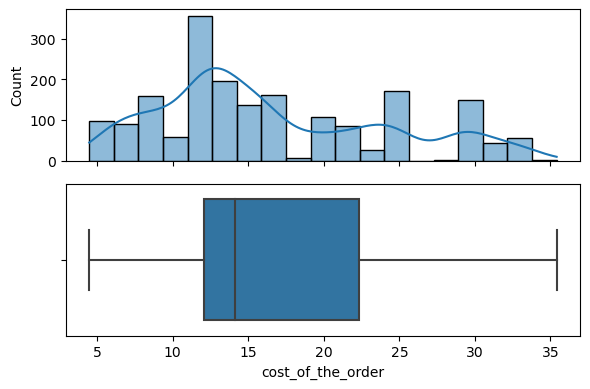

In [18]:
fig, axes = plt.subplots(2, 1, figsize=(6, 4), sharex=True)

# histogram plot
sns.histplot(data=df, x='cost_of_the_order', stat='count', kde=True, ax=axes[0])

# box plot
sns.boxplot(data=df, x='cost_of_the_order', ax=axes[1])

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

* The distribution is skewed to the right.
* There is no outlier in this column.
* 75% of the orders are priced at $22.30 and below.

**Observations on ratings**

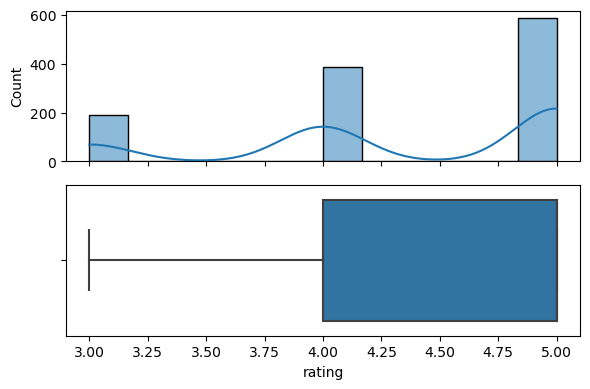

In [19]:
fig, axes = plt.subplots(2, 1, figsize=(6,4), sharex=True)

# histogram plot
sns.histplot(data=df, x='rating', stat='count', kde=True, ax=axes[0])

# box plot
sns.boxplot(data=df, x='rating', ax=axes[1])

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

* The distribution is heavily skewed to the left.
* There is no outlier in this column.
* 75% of the orders are rated above four(4) stars.

**Observations on food preparation time**

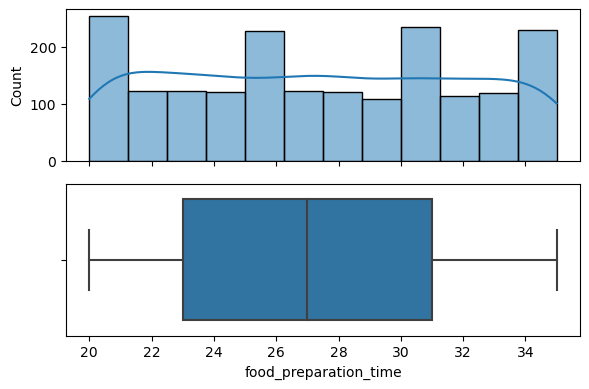

In [20]:
fig, axes = plt.subplots(2, 1, figsize=(6,4), sharex=True)

# kde plot
sns.histplot(data=df, x=df['food_preparation_time'], kde=True, ax=axes[0])

# box plot
sns.boxplot(data=df, x='food_preparation_time', ax=axes[1])

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

* The distribution is fairly uniform (notice the fairly rectangular shape of the distribution curve).
* There is no outlier in this column.
* Orders are prepared at an average time of 27.37 minutes.

**Observations on delivery time**

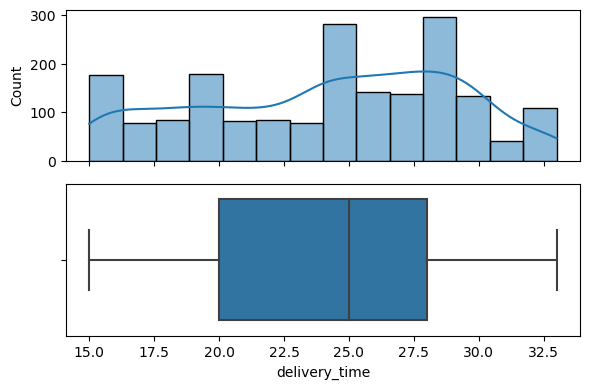

In [21]:
fig, axes = plt.subplots(2, 1, figsize=(6,4), sharex=True)

# kde plot
sns.histplot(data=df, x=df['delivery_time'], kde=True, ax=axes[0])

# box plot
sns.boxplot(data=df, x='delivery_time', ax=axes[1])

# Adjusting layout for better spacing
plt.tight_layout()
plt.show()

* The distribution is left skewed.
* There is no outlier in this column.
* Median of delivery time is around 25 minutes.

***Now let's assess the distribution of the categorical columns.***

**Observatons on cuisine type**

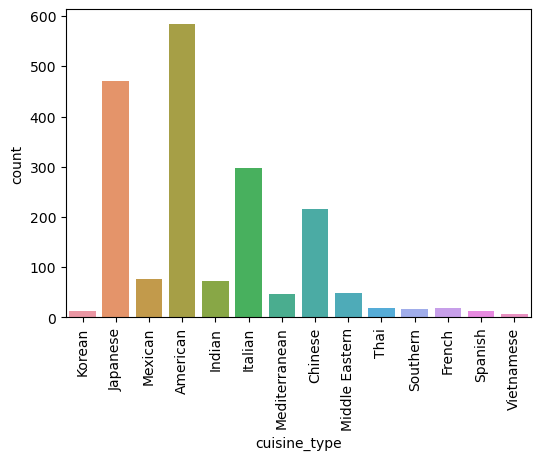

In [22]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='cuisine_type')
plt.xticks(rotation=90)
plt.show()

* American and Japanese cuisines are the most popular.
* Vietnamese, Korean, and Spanish cuisines have the lowest orders.

**Observations on day of the week**

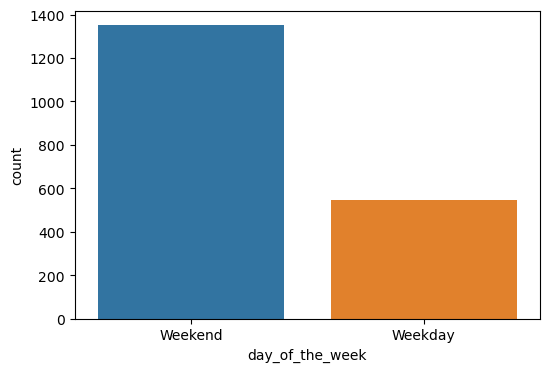

In [23]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df,x='day_of_the_week')
plt.show()

* Most of the orders are placed during weekends compared to weekdays

**Observations on restaurant name**

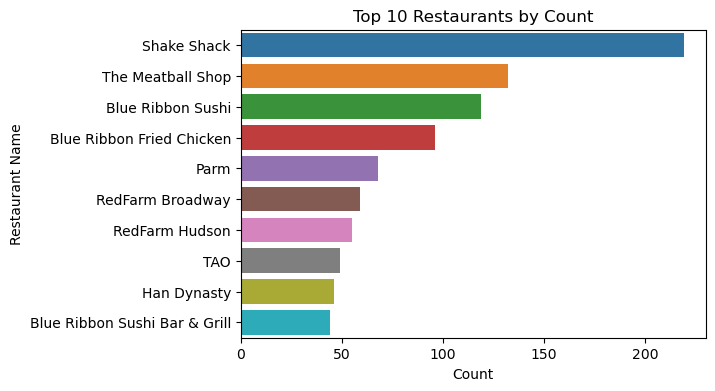

In [24]:
# Get the top 10 restaurant names and their counts
top_restaurants = df['restaurant_name'].value_counts().head(10)

# showing only the top 10 restaurants because there are so many restaurants making it difficult to plot
plt.figure(figsize=(6, 4))
sns.barplot(x=top_restaurants.values, y=top_restaurants.index)
plt.xlabel('Count')
plt.ylabel('Restaurant Name')
plt.title('Top 10 Restaurants by Count')
plt.show()

* The Top three most popular restaurants are Shake shack, The meatball shop, and Blue ribbon sushi

### **Culinary Champions:** In the bustling world of bites and banquets, some spots shine brighter. Let's spotlight the top 5 restaurants that have won the order race! 


In [25]:
df['restaurant_name'].value_counts().head()

Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: restaurant_name, dtype: int64

#### Observations:
* The top 5 restaurants are Shake shack, The Meatball shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm in descending order respectively.

### **Weekend Flavor Fest:** Weekends are for indulgence! Let's uncover which cuisine reigns supreme when the weekend vibes kick in. 


In [26]:
# Here, we filter for weekends, grouped by the type of cuisine and sort in descending order
df[df['day_of_the_week']=='Weekend'].groupby('cuisine_type')['day_of_the_week'].count().sort_values(ascending=False)

cuisine_type
American          415
Japanese          335
Italian           207
Chinese           163
Mexican            53
Indian             49
Mediterranean      32
Middle Eastern     32
Thai               15
French             13
Korean             11
Southern           11
Spanish            11
Vietnamese          4
Name: day_of_the_week, dtype: int64

#### Observations:
* The most popular cuisine on weekends is the American cuisine with 415 orders.

### **Gourmet Gauge:** In the realm of rich tastes, how many orders have the luxury price tag of over 20 dollars? Let's find out! 


In [27]:
(df['cost_of_the_order']>20).value_counts(normalize=True)*100

False   70.76
True    29.24
Name: cost_of_the_order, dtype: float64

#### Observations:
* The percentage of orders that cost above 20 dollars is 29.24%

### **Delivery Dash:** Speed is the name of the game! Let's clock in and find out the average time our orders take to reach hungry diners. 


In [28]:
mean_delivery_time = df['delivery_time'].mean()
print(f'Average delivery time is {round(mean_delivery_time, 2)} mins')

Average delivery time is 24.16 mins


#### Observations:
The mean order delivery time is 24.16 minutes

### **Loyalty Luxe:** Some diners just can't get enough! Let's roll out the red carpet for our top 3 regulars and discover who's about to enjoy a tasty 20% treat. 


In [29]:
top_customers = df['customer_id'].value_counts().head(3)
top_customers

52832    13
47440    10
83287     9
Name: customer_id, dtype: int64

#### Observations:
The top three customers who placed the most orders are customers with IDs **52832**, **47440**, and **83287**, who placed 13, 10, and 9 orders respectively.

### Multivariate Analysis

### **Data Dance:** Let's make our variables waltz together! Dive deep to uncover the intricate steps and patterns as numerical meets categorical in this multivariate ballet. 


**Observations on the correlation of all numerical columns**

Note: The order_id and customer_id columns are unique identifiers and will not be considered for the correlation.

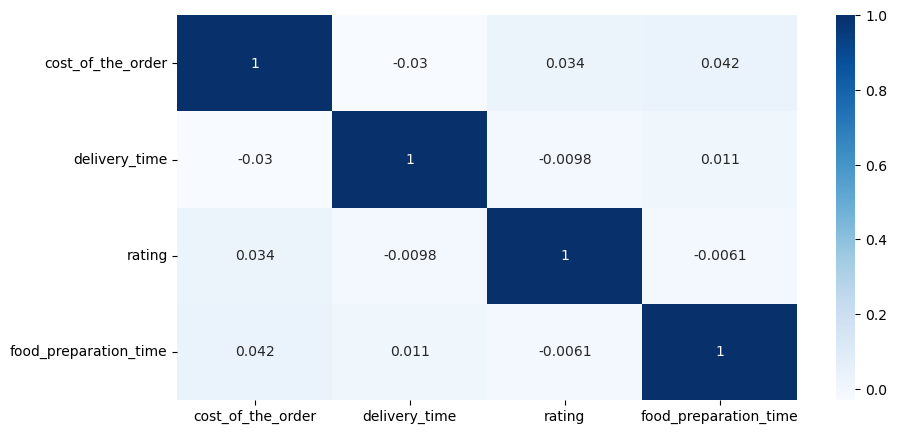

In [30]:
# creating a dataframe for the numerical columns
df_numerical = df[['cost_of_the_order', 'delivery_time', 'rating', 'food_preparation_time']]

# plotting the heatmap...
plt.figure(figsize=(10,5))
sns.heatmap(df_numerical.corr(), annot=True, cmap='Blues')
plt.show()

* There is a weak correlation between all variables. However, the highest correlation is between food preparation time and the cost of orders.

**The cost of order may vary based on the type of cuisine. Let's see which cuisine is priced higher**

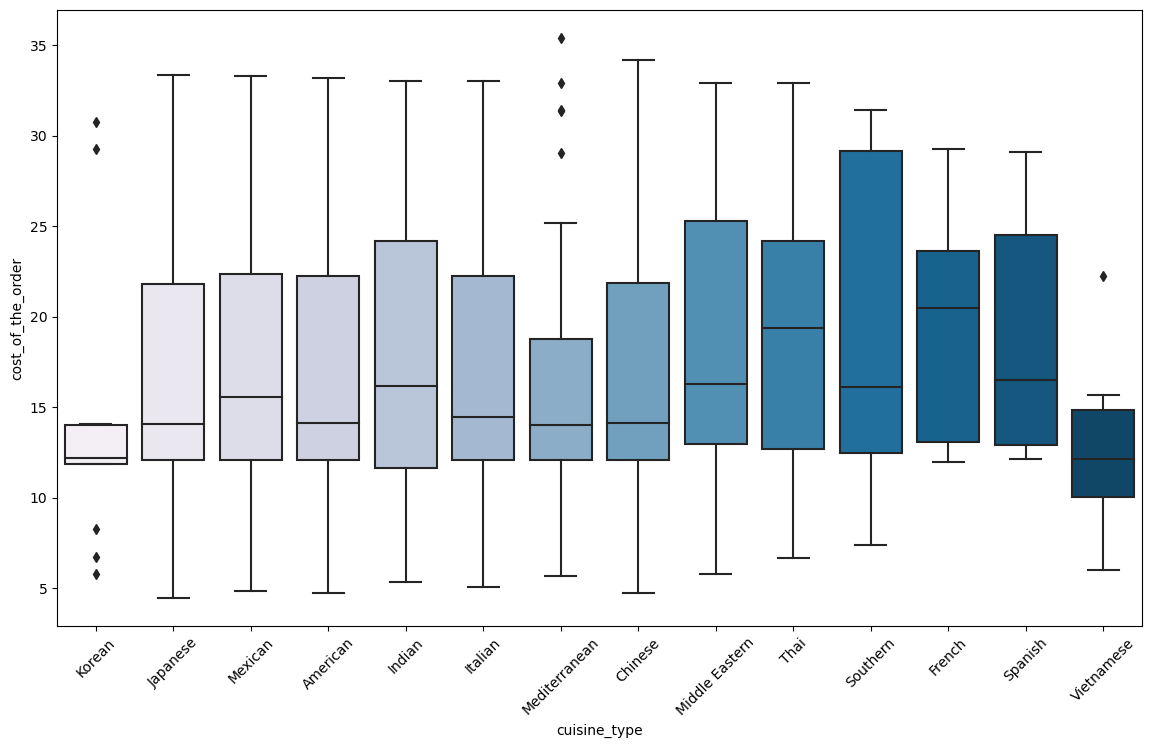

In [31]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='cuisine_type', y='cost_of_the_order', palette="PuBu")
plt.xticks(rotation = 45)
plt.show();

* Cuisines like the French and Thai cuisines have a higher median cost of order as compared to the rest.
* The Vietnamese and Korean cuisines have the lowest median prices.
* The Korean, Vietnamese, and Mediterranean cuisines contain outliers which may require further investigation.

**We can also assess the relationship between the time taken to prepare an order and the cuisine type**

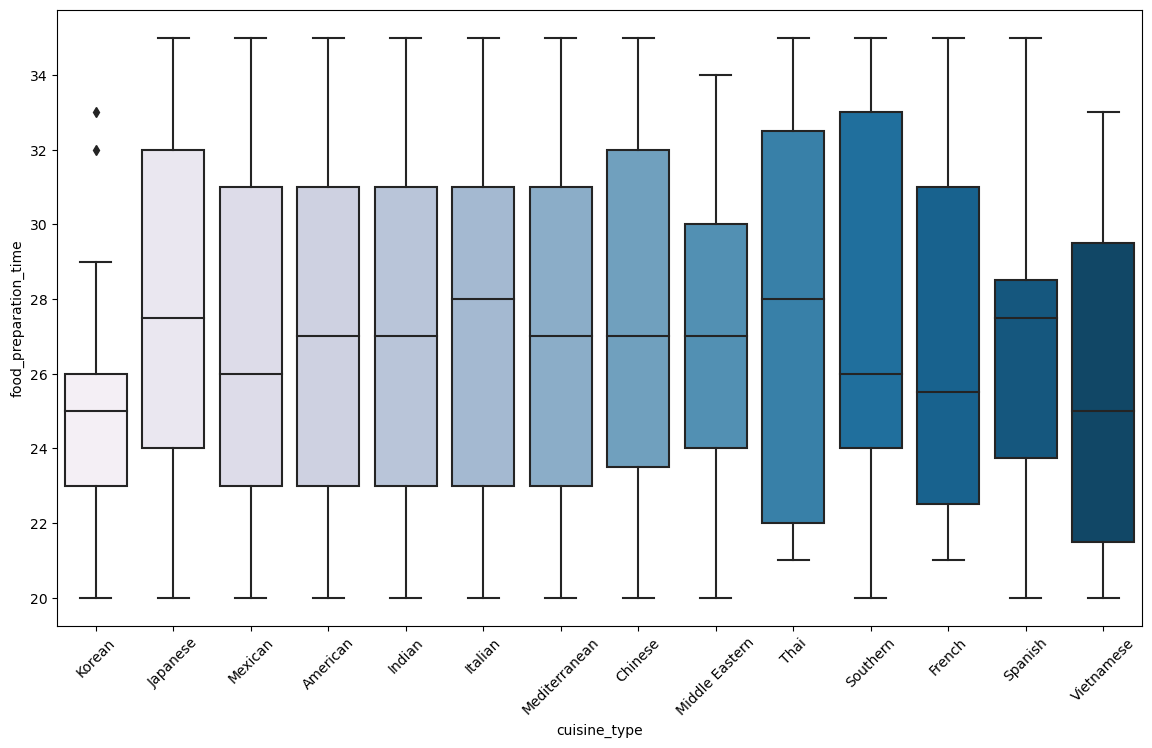

In [32]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='cuisine_type', y='food_preparation_time', palette="PuBu")
plt.xticks(rotation = 45)
plt.show();

* The Thai and Italian cuisines takes the longest median time to prepare an order.
* The Vietnamese cuisine takes the fastest time.
* Cuisines such as the American, Indian, Mediterranean, Chinese, and Middle Eastern cuisines share similar median times for food preparation.

**Similarly, we can also look at the relationship of the cuisine type with the delivery time.**

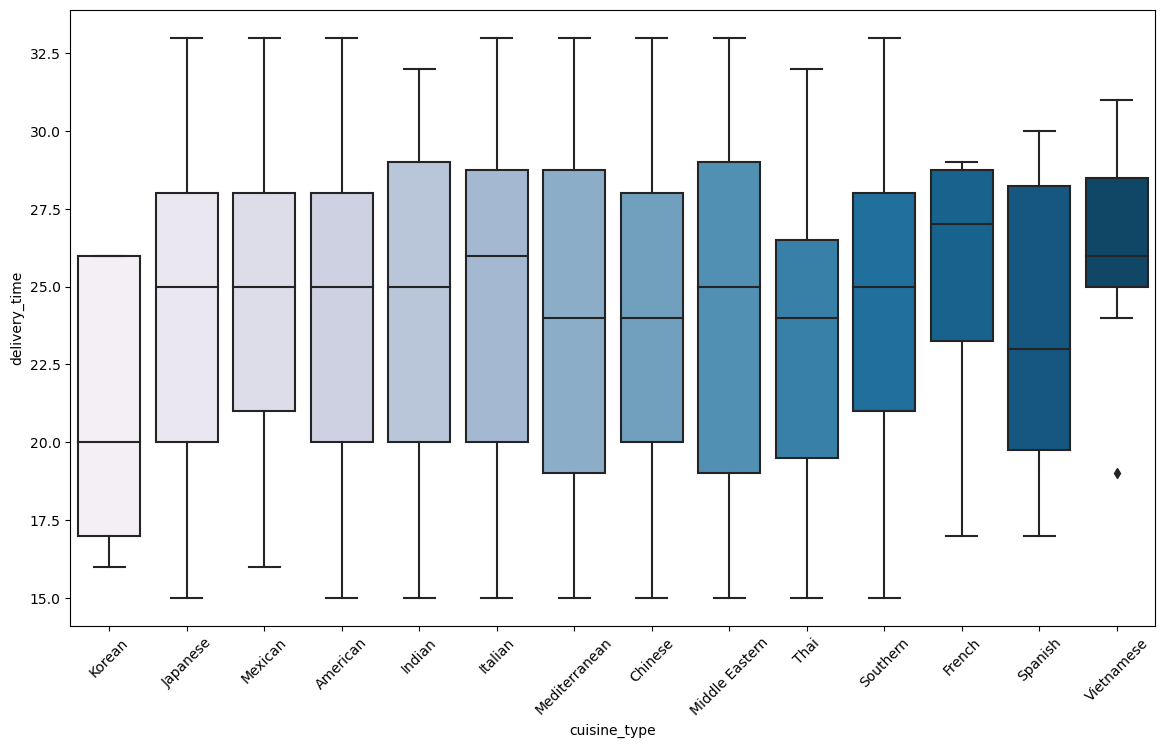

In [33]:
plt.figure(figsize=(14,8))
sns.boxplot(data=df, x='cuisine_type', y='delivery_time', palette="PuBu")
plt.xticks(rotation=45)
plt.show();

* The French cuisine has the longest median time of delivery.
* The Korean and Spanish cuisines have the fastest meal delivery times.

**Now let's look at the distribution of the order costs, delivery, and food preparation time based on the day of the week.**

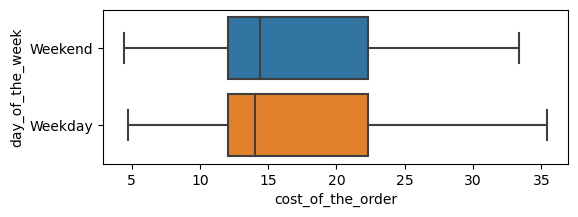

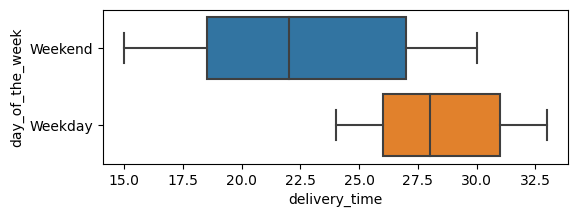

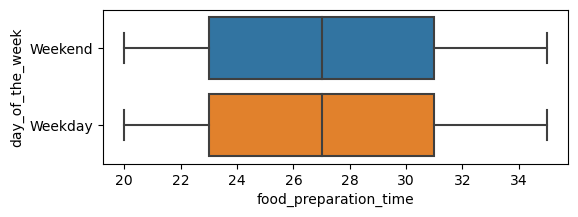

In [34]:
# storing the variables of interest in a list, and using a for loop for plotting...
x = ['cost_of_the_order', 'delivery_time', 'food_preparation_time']
for i in x:
    plt.figure(figsize=(6,2))
    sns.boxplot(data=df, x=i, y='day_of_the_week')
    plt.show();

* The food preparation time is the same regardless of the day of the week.
* Delivery time is usually higher on weekdays

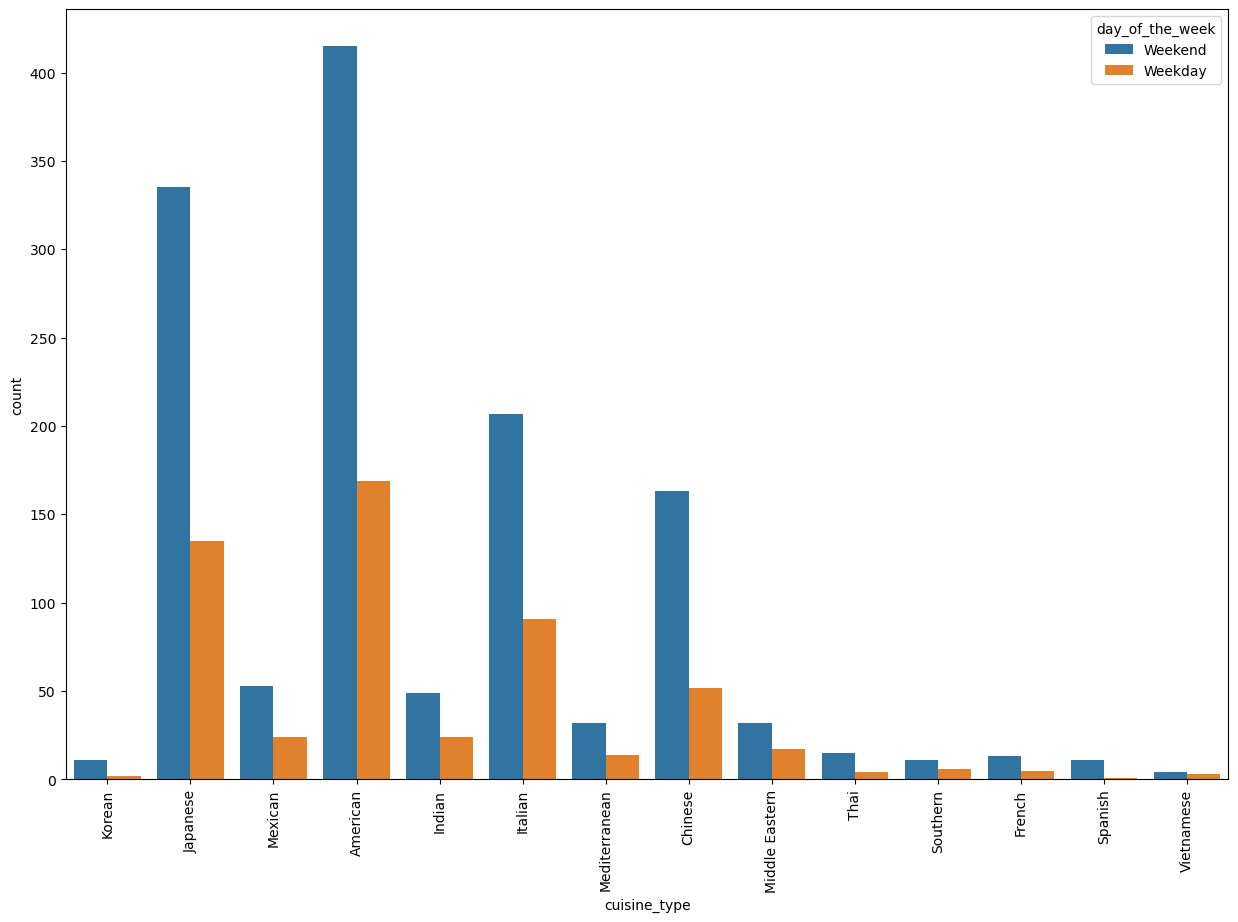

In [35]:
plt.figure(figsize=(15,10))
sns.countplot(data=df, x='cuisine_type', hue='day_of_the_week')
plt.xticks(rotation=90);

* The American cuisine gets the highest orders on both weekdays and weekends.

### **Star-Studded Spotlight:** Who's ready for the limelight? Let's scout for those culinary stars with rave reviews and a fan base to match. Which restaurants have the magic combo of over 50 ratings and an average score soaring above 4? 

In [36]:
# let's get restaurants with rating count > 50
restaurants_above_50 = df['restaurant_name'].value_counts()[df['restaurant_name'].value_counts() > 50]

# let's evaluate the mean rating for each restaurant
restaurant_means = df.groupby('restaurant_name')['rating'].mean()

# now I will filter out restaurants with mean rating > 4
means_above_4 = restaurant_means[restaurant_means > 4]

# Creating DataFrames for both filters
restaurants_above_50_df = pd.DataFrame({'restaurant_name': restaurants_above_50.index, 'rating_count': restaurants_above_50.values})
means_above_4_df = pd.DataFrame({'restaurant_name': means_above_4.index, 'average_rating': means_above_4.values})

# Merging DataFrames to get qualified restaurants
qualified_restaurants = pd.merge(restaurants_above_50_df, means_above_4_df, on='restaurant_name')

qualified_restaurants


,restaurant_name,rating_count,average_rating
0,Shake Shack,219,4.28
1,The Meatball Shop,132,4.51
2,Blue Ribbon Sushi,119,4.22
3,Blue Ribbon Fried Chicken,96,4.33
4,Parm,68,4.13
5,RedFarm Broadway,59,4.24
6,RedFarm Hudson,55,4.18


#### Observations:
* There are seven (7) restaurants that meet the criteria for the promotional offers which include:
 * Shake shack
 * The Meatball Shop
 * Blue Ribbon Sushi
 * Blue Ribbon Fried Chicken
 * Parm
 * RedFarm Broadway
 * Redfarm Hudson

### **Cash Crunch:** Let's dive into the dough! With a sliding scale of charges based on order prices, how much has FoodHub cooked up in revenue? Time to tally the tasty totals! 

In [37]:
# let's calculate the revenue generated by 25% charge on orders with cost > $20
revenue_above_20 = (df['cost_of_the_order'] * 0.25).loc[df['cost_of_the_order'] > 20].sum()

# now I evaluate the revenue generated by 15% charge on orders with cost > $5 and <= $20
revenue_above_5_below_20 = (df['cost_of_the_order'] * 0.15).loc[(df['cost_of_the_order'] > 5) & (df['cost_of_the_order'] <= 20)].sum()

# getting the total net revenue
net_revenue = revenue_above_20 + revenue_above_5_below_20

print(f"Net revenue generated by the company: ${round(net_revenue, 2)}")

Net revenue generated by the company: $6166.3


#### Observations:
* The Net revenue generated by the company is $6,166.3

### **Race Against the Clock:** In the fast-paced world of food delivery, every minute counts! Let's find out: how often does the journey from order to door exceed the 60-minute mark? 

In [38]:
# first, I'll calculate the total time required for each order to be delivered (preparation time + delivery time)
df['total_delivery_time'] = df['food_preparation_time'] + df['delivery_time']

# now, I evaluate the percentage of orders that take more than 60 minutes to be delivered
percentage_above_60 = (df['total_delivery_time'] > 60).mean() * 100

print(f"The percentage of orders taking more than 60 minutes to be delivered is {round(percentage_above_60, 2)}%")


The percentage of orders taking more than 60 minutes to be delivered is 10.54%


#### Observations:
* The percentage of orders taking more than 60 minutes to be delivered is 10.54%

### **Weekday vs. Weekend Wonders:** Time's ticking! Does the weekday hustle or the weekend chill impact our delivery speed? Let's compare the average delivery times and see where the clock stands. 

In [39]:
# Calculating the mean delivery time for weekdays and weekends
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

mean_delivery_time

day_of_the_week
Weekday   28.34
Weekend   22.47
Name: delivery_time, dtype: float64

#### Observations:
* The mean delivery time for week days appear to be more than weekends by 5.87%, which implies that there might be factors that increases the delivery time on weekdays such as high traffic. This is also evident from my previous boxplot of delivery_time against day_of_the_week.

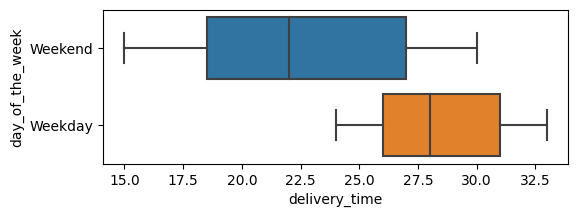



### Conclusion and Recommendations

### Conclusions:
*  American and Japanese cuisines are most popular, while Vietnamese, Korean, and Spanish cuisines have fewer orders.
* Top 5 restaurants by order count: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, Parm.
* Seven restaurants qualify for promotional offers.
Net revenue generated by the company is $6,166.3.
* A small percentage (10.54%) of orders take more than 60 minutes for delivery.
* Mean delivery time is higher on weekdays compared to weekends.
* Orders are more frequent on weekends compared to weekdays.
* Weak correlation between variables; highest correlation between food preparation time and cost of orders.
* French and Thai cuisines have higher median order costs, while Vietnamese and Korean have the lowest.
* Delivery time varies across cuisines; French takes the longest, Korean and Spanish the shortest.
* Food preparation time is consistent regardless of the day of the week.

### Recommendations:

*  Implement strategies to improve food preparation times for more efficient service.
* Consider investigating weekday-specific factors affecting delivery times.
* Tailor marketing efforts towards popular cuisines like American and Japanese.
* Develop targeted promotional offers for the seven qualifying restaurants.
* Utilize insights to optimize order placement and delivery processes.
* Further explore correlations between variables for potential insights.
* Enhance customer satisfaction by addressing factors causing delivery delays on weekdays.

---